# Keras costs visualizations
In this notebook we will visualize different costs associated with different popular architectures

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import json
report_paths = ["VGG16_06-23-20-27.timings.json","VGG16_06-23-20-34.timings.json", "VGG16_06-23-20-42.timings.json"]
reports = list()
for path in report_paths:
    with open(path) as file:
        reports.append(json.load(file))

### Layer wise costs

model     : VGG16
loss      : binary_crossentropy
optimizer : sgd
device    : gpu
samples   : 1
num_calls : 2
trials    : 3
full_profiling: False
suppress_negatives: False
no_warmup : False
out       : None
log       : None


C:\Users\GIGABYTE-S\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\GIGABYTE-S\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\GIGABYTE-S\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\GIGABYTE-S\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\GIGABYTE-S\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


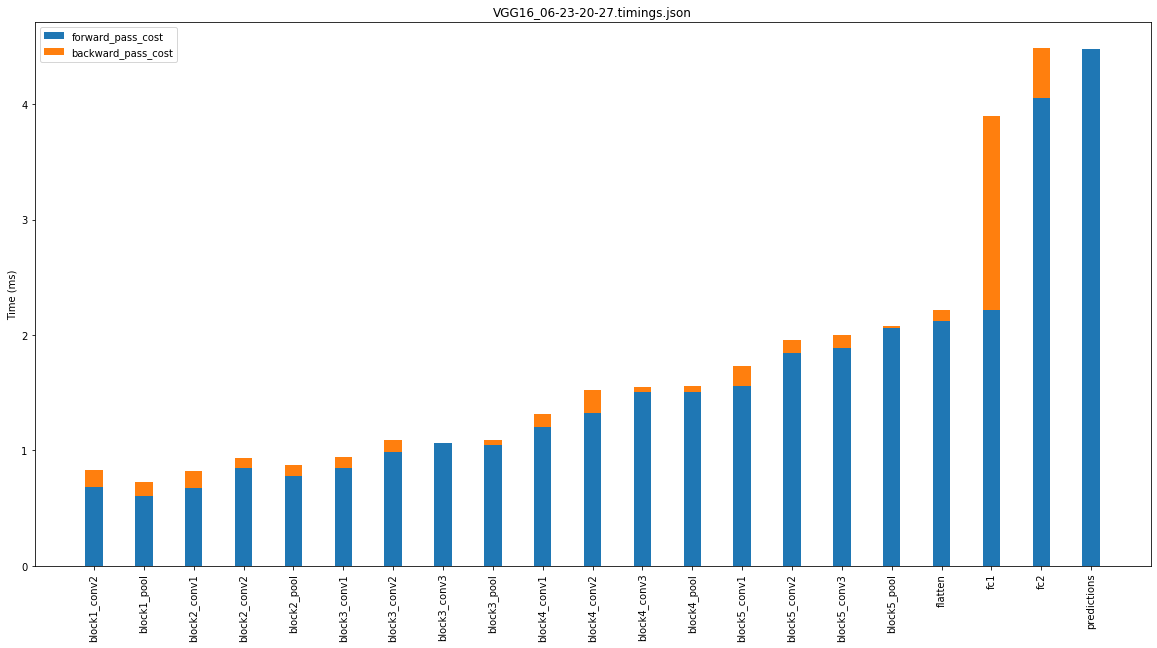

model     : VGG16
loss      : binary_crossentropy
optimizer : sgd
device    : gpu
samples   : 1
num_calls : 2
trials    : 3
full_profiling: False
suppress_negatives: False
no_warmup : False
out       : None
log       : None


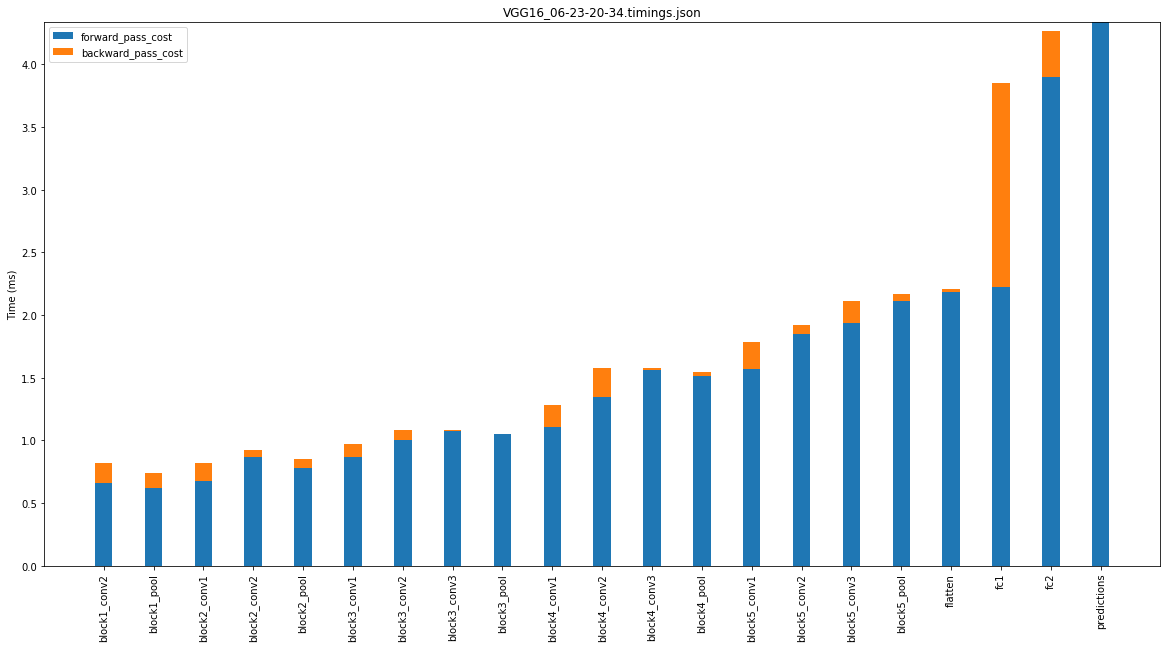

model     : VGG16
loss      : binary_crossentropy
optimizer : sgd
device    : cpu
samples   : 1
num_calls : 2
trials    : 3
full_profiling: False
suppress_negatives: False
no_warmup : False
out       : None
log       : None


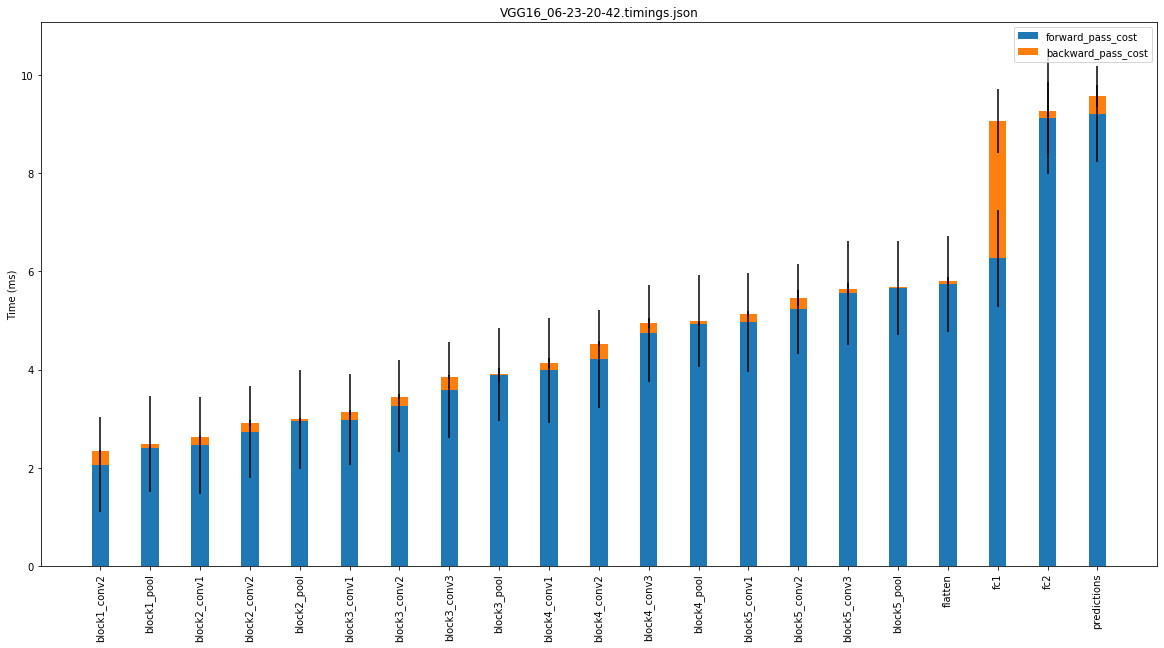

In [33]:
skip_first_layer = True # First layer is usually an outlier
for i, report in enumerate(reports):
    for item in report["args"].items():
        print("{:10}: {}".format(*item))
    timings = report["timings"]
    N = len(timings) - (1 if skip_first_layer else 0)
    normalizing_factor = report["args"]["samples"] * 10**6 # Milliseconds instead of nano seconds
    means = dict()
    stds = dict()
    xticks = list()
    for layer_name in list(timings.keys())[(1 if skip_first_layer else 0):]:
        for cost_name in timings[layer_name].keys():
            if not cost_name.endswith("cost"):
                continue
            if cost_name not in means.keys():
                means[cost_name] = list()
            if cost_name not in stds.keys():
                stds[cost_name] = list()
            data = np.array(timings[layer_name][cost_name]) / 10 **9
            means[cost_name].append(np.mean(data))
            stds[cost_name].append(np.std(data))
        xticks.append(layer_name)

    plt.figure(figsize=(20,10))
    ind = np.arange(N)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence
    accumulated_means = np.zeros(shape=N)
    for cost in means.keys():
        p = plt.bar(ind, means[cost], width, yerr=stds[cost], bottom=accumulated_means, label=cost)
        accumulated_means += means[cost]

    plt.ylabel('Time (ms)')
    plt.title(report_paths[i])
    plt.xticks(ind, xticks, rotation="vertical")
    plt.legend()
    plt.show()


### Layer type wise costs